# SVM｜Support-Vector Machine
scikit-learn の SVM による 手書き文字の認識

### 利用するライブラリ
* numpy：数値計算
* matplotlib.pyplot：画像表示

* scikit-learn
  * datasets：機械学習サンプルデータ
  * train_test_split：学習用データとテストデータの分離
  * svm：判別アルゴリズム サポートベクターマシン
  * metrics：モデルの評価を行うモジュール

* pillow（PIL）：画像処理
* requests, io：画像データの読み込み

### 利用するデータ
* digits（scikit-learn の datasets に含まれます）
  * MNIST（以下がオリジナル）のスモール版  
  http://yann.lecun.com/exdb/mnist/  
  * データは 0～9の 数字がそれぞれ180個前後、計1797個
  * 個々の画像は、サイズ 8×8、明暗 0〜16 のデータ
* 判別確認用のサンプル画像
  * https://github.com/koichi-inoue/DataScience/blob/main/digit2.png
  * https://github.com/koichi-inoue/DataScience/blob/main/digit7.png

### ライブラリの読み込み

In [ ]:
# 標準的なライブラリ
import numpy as np
import matplotlib.pyplot as plt

# 機械学習用ライブラリ
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

# 画像の読み込みと表示確認に利用するライブラリ
import requests
import io
from PIL import Image


### データの読み込み

In [ ]:
# 手書き数字データの読み込み
digits = datasets.load_digits()

# 学習データ（ 画像データはベクトルなので慣例にしたがって X は大文字 ）
X = digits.data

# 教師データ（ 回答は「数値」なので慣例にしたがって y は小文字）
y = digits.target

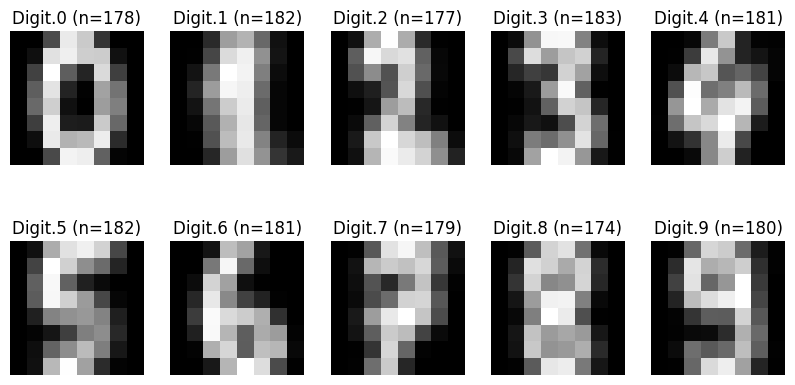

In [ ]:
# 各数字データの平均化した値を画像出力して確認（参考までに｜処理上は不要）
output_images = np.zeros((10,8,8))
fig = plt.figure(figsize=(10,5))
for i in range(10):
    output_images[i] = digits.images[y == i].mean(axis=0)
    ax = fig.add_subplot(2, 5, i+1)
    ax.axis('off')
    ax.set_title('Digit.{0} (n={1})'.format(i, len(digits.images[y == i])))
    ax.imshow(output_images[i], cmap=plt.cm.gray, interpolation='none')
plt.show()

### 学習用データとテストデータの分割

In [ ]:
# データを学習用とテスト用に分割する
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 )


### 判別学習

In [ ]:
# 判別アルゴリズムに SVM を使用
clf = svm.SVC( C=1.0, kernel='linear' )

# 学習
clf.fit( X_train, y_train )

SVC(kernel='linear')

* SVM(サポートベクターマシン)とは、教師あり学習のクラス分類と、回帰のできる機械学習アルゴリズムです。

### 予測

In [ ]:
# 予測（Predicted）
y_pred = clf.predict( X_test )

# 正解率 (Accuracy)
metrics.accuracy_score(y_pred, y_test)

0.975

* テストデータでは、98% の正解率になっています。

### 混同行列で確認

In [ ]:
# predicted（X_test の予測） y_testでクロスをとる。
metrics.confusion_matrix( y_pred, y_test )

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0, 39,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 29,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29,  0,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 31,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1, 38]])

* 対角線上にあるものは、正しく予測されたデータの数で、対角線から外れたものは、予測が間違えていることを意味します。

## 自作画像で検証

### サンプル画像の読み込み

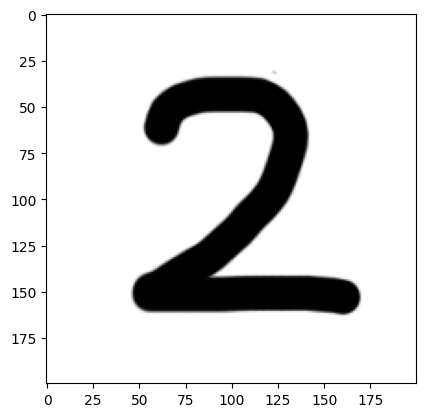

In [ ]:
# サンプル画像の読み込み
url = requests.get('https://raw.githubusercontent.com/koichi-inoue/DataScience/main/digit2.png')

# 画像を読み込んで 8bit(256階調) gray に変換
my_image = Image.open(io.BytesIO(url.content)).convert('L')
plt.imshow(my_image, cmap=plt.cm.gray)
plt.show()

### 画像データをモデルの形式に合わせる

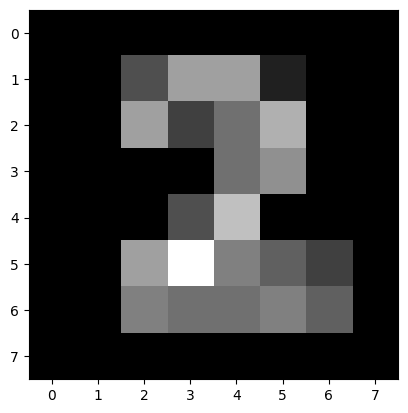

In [ ]:
# 8×8にリサイズ
my_image = my_image.resize((8, 8), Image.LANCZOS)
# ndarray型に変換
my_image = np.array( my_image, dtype=float )
# レベルを 0-16にするとともに階調を反転
my_image = 16 - np.floor(17 * my_image / 256)

# 画像出力（digits形式に変換後）
plt.imshow(my_image,cmap=plt.cm.gray, interpolation='none')
plt.show()


### 予測（画像認識）

In [ ]:
# 二次元を一次元に変換
my_image = my_image.reshape((-1,64))
# 予測判定
res = clf.predict( my_image )
res[0]

2

* 正しく認識されました。